In [57]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [66]:
def get_deg_sum(G):
    nodes = list(G.nodes())
    tot = 0
    for node in nodes:
        tot += G.degree(node)
    return tot

# A
def gen_pref(T):
    G = nx.Graph()
    G.add_edge(0, 1)
    for newcomer in range(2, T, 1):
        G.add_node(newcomer)
        deg_sum = get_deg_sum(G)
        for existing in range(newcomer):
            p = G.degree(existing) / deg_sum
            if np.random.random() < p:
                G.add_edge(newcomer, existing)

    degrees = [d for n, d in G.degree()]
    return G, degrees

# B
def configuration_graph(degrees):
    v = []
    G = nx.Graph()
    for i, k in enumerate(degrees):
        v.extend([i for x in range(k)])
    v = np.random.permutation(v)
    for i in range(0, len(v), 2):
        G.add_edge(v[i], v[i+1])
    return G

# A

In [67]:
T = 300
G_pref, degrees = gen_pref(300)

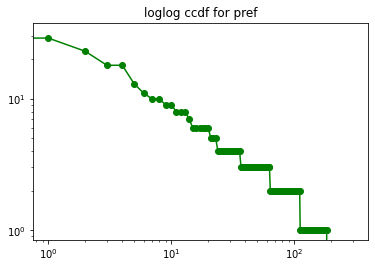

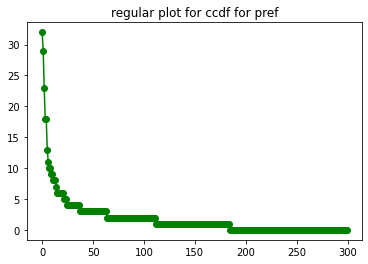

In [75]:
degree_sequence = sorted(degrees, reverse=True)
plt.loglog(degree_sequence, "g-", marker="o")
plt.title("loglog ccdf for pref")
plt.show()
plt.plot(degree_sequence, "g-", marker="o")
plt.title("regular plot for ccdf for pref")
plt.show()

We definitely see a heavy-tail here given these plots.

# B

In [69]:
T = 300
G_pref, degrees = gen_pref(300)
G_config = configuration_graph(degrees)

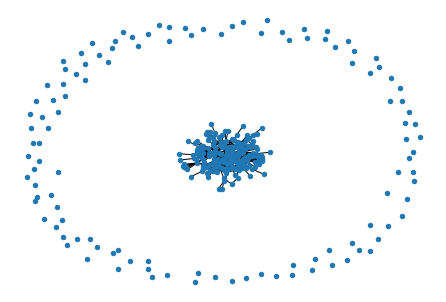

In [77]:
nx.draw(G_pref, node_size=20)

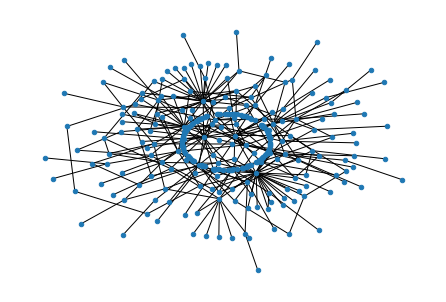

In [79]:
nx.draw_kamada_kawai(G_pref, node_size=20)

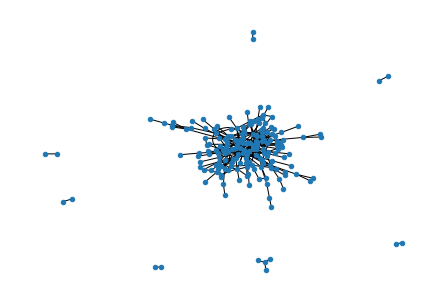

In [81]:
nx.draw(G_config, node_size=20)

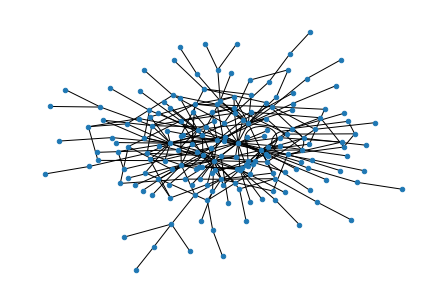

In [80]:
nx.draw_kamada_kawai(G_config, node_size=20)

# C
The differences I see are that the pref generated graph has a more uniform structure of disconnected components, while the config graph has smaller, disconnected clusters all around a main cluster in the middle. The pref graph has a bit more structure to it as well, forming a "social circle" of sorts with the highly connected nodes. 